# Demo: 
## Machine learning models



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# the following line allows ipython to display plots
%matplotlib inline  

`cars.csv` is in an easy-to-read comma separated format and the following *pandas* functionality makes it easy to read it into a `DataFrame` object. 

In [3]:
# read this csv file, remember to put the full path to 
# the directory where you saved the data
df = pd.read_csv('D:\Rowan\AI_ML\cars.csv')  # df is DataFrame object
print (df.head())    # see the first 5 rows of the loaded table

                         Car   MPG  Cylinders  Displacement  Horsepower  \
0  Chevrolet Chevelle Malibu  18.0          8         307.0         130   
1          Buick Skylark 320  15.0          8         350.0         165   
2         Plymouth Satellite  18.0          8         318.0         150   
3              AMC Rebel SST  16.0          8         304.0         150   
4                Ford Torino  17.0          8         302.0         140   

   Weight  Acceleration  Model Origin  
0    3504          12.0     70     US  
1    3693          11.5     70     US  
2    3436          11.0     70     US  
3    3433          12.0     70     US  
4    3449          10.5     70     US  


In [4]:
print ("Data type: ") 
print (df.dtypes ) 

Data type: 
Car              object
MPG             float64
Cylinders         int64
Displacement    float64
Horsepower        int64
Weight            int64
Acceleration    float64
Model             int64
Origin           object
dtype: object


Scatterplot between MPG and Weight attributes:

Text(0, 0.5, 'weight')

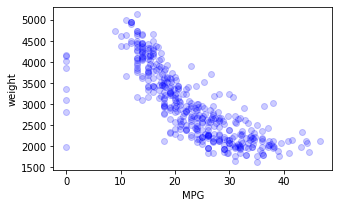

In [5]:
plt.figure(figsize=(5,3))
plt.scatter(df['MPG'],df['Weight'], color='blue', alpha=0.2);
plt.xlabel("MPG")
plt.ylabel("weight")

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression

'''
df.loc[df['Origin'] == 'Japan', 'label'] = 1  
df.loc[df['Origin'] == 'Europe', 'label'] = 2 
df.loc[df['Origin'] == 'US', 'label'] = 3 

print ( df['label'].value_counts(ascending=True) )
print ("Baseline accuracy: ")
print (254/(73+79+254))  # 0.62
# D tree is fine with this
'''

df.loc[df['Origin'] != 'US', 'label'] = int(0) 
df.loc[df['Origin'] == 'US', 'label'] = int(1)


data = df[['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model', 'label' ]]
X_train, X_test = train_test_split( data ,test_size=0.1, random_state=42)

train_bags   = X_train[ [ 'MPG', 'Cylinders', 'Horsepower', 'Weight'] ]
train_labels =  X_train[ ['label'] ]

test_bags   = X_test[ [ 'MPG', 'Cylinders', 'Horsepower', 'Weight'] ]
test_labels = X_test[ ['label'] ]






In [8]:
print (train_bags[:3])  # check first three data
print (train_labels[:3])  # check first three data

      MPG  Cylinders  Horsepower  Weight
318  32.1          4          70    2120
140  16.0          6         100    3781
114  18.0          6         100    2789
     label
318    1.0
140    1.0
114    1.0


In [9]:
print ("Showing data labels: ")
print ( df['label'].value_counts(ascending=True) )


Showing data labels: 
0.0    152
1.0    254
Name: label, dtype: int64


In [10]:
print ("Baseline accuracy: ")
print (254/(254+152))

Baseline accuracy: 
0.625615763546798


In [11]:
print ("Model: Linear regression")
reg = LinearRegression()
reg.fit(train_bags, train_labels)
predictions = reg.predict( test_bags )
prediction_label = [1 if x>0.7 else 0 for x in predictions ]
print ("Accuracy:" + str ( round( accuracy_score(test_labels, prediction_label) , 4) ) ) 


Model: Linear regression
Accuracy:0.8049


In [12]:
print ("*" * 25)
print ("Model: Decision Tree")
dTree = DecisionTreeClassifier( )         #max_depth= 5
dTree.fit(train_bags, train_labels)
predictions = dTree.predict(test_bags)
print ("Accuracy:" + str ( round( accuracy_score(test_labels, predictions) , 4) ) ) 

*************************
Model: Decision Tree
Accuracy:0.7805


**Questions:**

1) Run the models including other attributes and report the result.

2) Do you see any improvements? Explain the reasons behind the results.

3) Do you have any other suggestions to improve the model accuracy?

4) Run any other classifier method (i.e. random forest) and report the result with explanation. 

5) Do you think neural network would be a good model for this problem? Justify your answer.
